In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [65]:
X,y = make_blobs(n_samples = 500,n_features = 2, centers = 5,random_state =3)

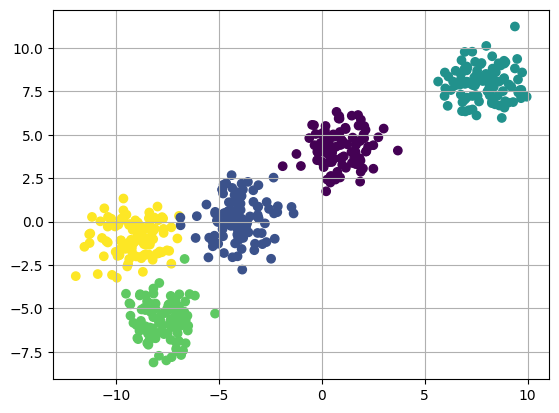

In [66]:
fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1],c = y)
plt.show()

In [67]:
k = 5

colors = [ "green", "yellow", "blue", "cyan" , "red"]
clusters = {}

for idx in range(k):
    center = 10*(2* np.random.random((X.shape[1],)) -1)
    points = []
    cluster = {
        "center" : center,
        "points" : [],
        "color" : colors[idx]
    }
    clusters[idx] = cluster

In [68]:
clusters

{0: {'center': array([ 0.16716053, -4.50738243]),
  'points': [],
  'color': 'green'},
 1: {'center': array([8.19392228, 9.98007959]),
  'points': [],
  'color': 'yellow'},
 2: {'center': array([ 2.63874879, -8.7941776 ]),
  'points': [],
  'color': 'blue'},
 3: {'center': array([-3.77107346,  8.38211003]),
  'points': [],
  'color': 'cyan'},
 4: {'center': array([3.17108984, 3.96595592]), 'points': [], 'color': 'red'}}

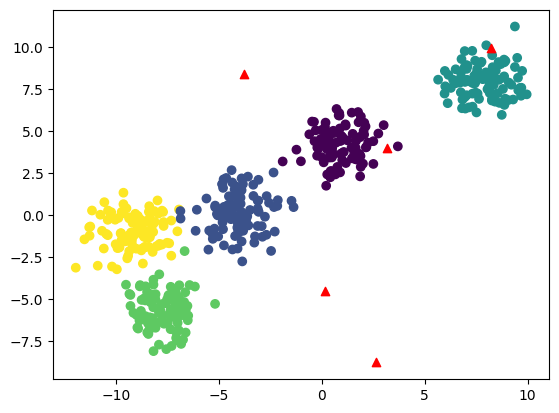

In [69]:
plt.scatter(X[:,0],X[:,1], c = y)

for i in clusters:
    center = clusters[i]["center"]
    plt.scatter(center[0],center[1], marker = "^", c ="red")
plt.show()

In [70]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [71]:
v1 = np.array([1,2])
v2 = np.array([3,4])
distance(v1,v2)

2.8284271247461903

In [74]:
def assign_clusters():
    for idx in range(X.shape[0]):
        dist = []
        curr_x = X[idx]
        for i in range(k):
            dis = distance(curr_x,clusters[i]['center'])
            dist.append(dis)
        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)


#Implementing the M-step
def update_clusters():
    for idx in range(k):
        pts = np.array(clusters[idx]["points"])
        if pts.shape[0] > 0:
            new_center =  pts.mean(axis = 0)
            clusters[idx]["center"] = new_center
            
            clusters[idx]["points"] = []



def plot_clusters():
    for i in clusters:
        pts = np.array(clusters[i]["points"])
        try:
            plt.scatter(pts[:,0],pts[:,1],c=clusters[i]["color"])
        except:
            pass
        center = clusters[i]["center"]
        plt.scatter(center[0],center[1],c="black", marker="^")


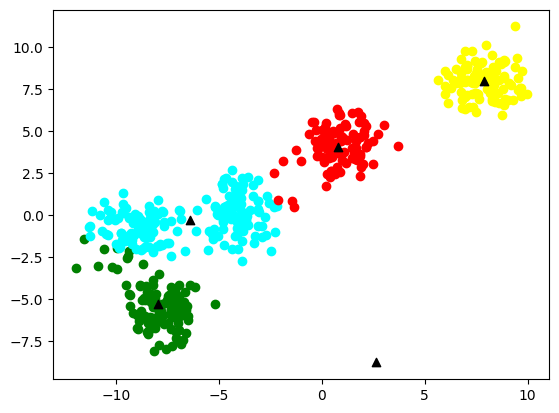

In [81]:
assign_clusters()
plot_clusters()
update_clusters()

In [82]:
from sklearn.cluster import KMeans

In [84]:
km = KMeans(n_clusters = 5)

In [85]:
X, y = make_blobs(n_samples= 500,n_features= 2, centers= 5, random_state = 3)

In [87]:
km.fit(X,y)

/home/azureuser/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [90]:
centers =  km.cluster_centers_

In [92]:
labels = km.labels_
print(len(labels))

500


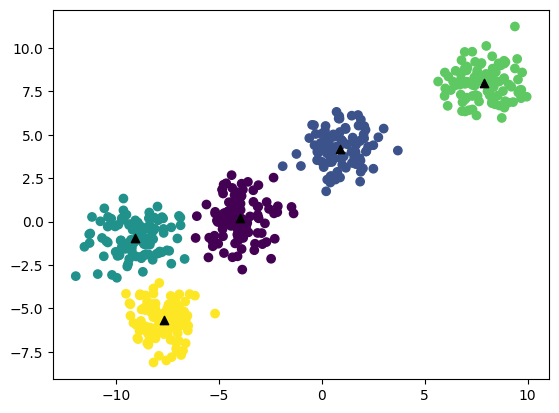

In [93]:
plt.scatter(X[:,0],X[:,1], c = labels)
plt.scatter(centers[:,0],centers[:,1],c = "black", marker = "^")
plt.show()